In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("kc_house_data.csv")
data = data.sample(frac=0.01)
# data = data[:100]

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7053,5196420290,20150317T000000,940000.0,4,2.75,3270,9231,2.0,0,0,...,10,3270,0,1995,0,98052,47.6539,-122.121,3380,10154
19140,3816700150,20141114T000000,430000.0,3,2.00,2350,12480,1.0,0,0,...,7,1600,750,1981,0,98028,47.7661,-122.262,2160,12000
2846,5561400740,20150210T000000,593500.0,5,3.25,4300,50405,2.0,0,0,...,8,3220,1080,1972,0,98027,47.4615,-122.000,2680,41684
10548,7663700783,20140613T000000,369500.0,3,1.50,1650,9957,1.0,0,0,...,7,1100,550,1961,0,98125,47.7303,-122.298,1650,7957
5800,2770604103,20140731T000000,450000.0,3,2.50,1530,762,2.0,0,0,...,8,1050,480,2007,0,98119,47.6420,-122.374,1610,1482


In [4]:
X = data['sqft_living']
y = data['price']

In [5]:
x_max = np.max(X)
x_min = np.min(X)

X = np.divide(X - x_min, x_max-x_min)

y_max = np.max(y)
y_min = np.min(y)

y = np.divide(y - y_min, y_max-y_min)

In [6]:
X.head()

7053     0.562105
19140    0.368421
2846     0.778947
10548    0.221053
5800     0.195789
Name: sqft_living, dtype: float64

In [7]:
X = X.values
y = y.values

In [8]:
def cost_function(th0,th1,X,y):
    J = 0
    for i in range(len(X)):
        J = J + (th0 + th1*X[i] - y[i])**2
    return J;

In [9]:
def gradient_descent(X, y, alpha, max_it):
    count = 0
    s = 0
    m = len(X)
    J_min = 1000
    th0_opt = th0 = 0
    th1_opt = th1 = 0
    for i in range(len(X)):
        if(count == max_it):
            break
        for j in range(len(X)):
            s = s + ( th0 + th1*X[j] - y[j] )
        gr0 = (float)(1/m) * s 
        gr1 = (float)(1/m) * s * X[i]
        th0 = th0 - (alpha)*gr0
        th1 = th1 - (alpha)*gr1
        count = count +1
        J = cost_function(th0,th1,X,y)
        print("Epoch :",count, " th0 : ",th0, " th1 : ",th1," J : ",J)
        if(J_min > J):
            J_min = J
            th0_opt = th0
            th1_opt = th1
    return th0_opt,th1_opt,J_min

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# y_train.values

In [11]:
th0, th1, J = gradient_descent(X,y,0.01,200)

Epoch : 1  th0 :  0.0013053015099715104  th1 :  0.0007337168487629332  J :  5.551175806378848
Epoch : 2  th0 :  0.0039006474251103897  th1 :  0.0016898969227614677  J :  5.3877696363636955
Epoch : 3  th0 :  0.0077572119157312555  th1 :  0.004693957683876668  J :  5.119136933446348
Epoch : 4  th0 :  0.012827405120833905  th1 :  0.005814737234478307  J :  4.8366955496567545
Epoch : 5  th0 :  0.019057158280043042  th1 :  0.007034457326702411  J :  4.509944492551395
Epoch : 6  th0 :  0.026380509815476665  th1 :  0.008344951811990534  J :  4.152096377711144
Epoch : 7  th0 :  0.034720289478682914  th1 :  0.0107152049794281  J :  3.761297143735971
Epoch : 8  th0 :  0.04398597921865364  th1 :  0.011261393006205322  J :  3.4007872558657266
Epoch : 9  th0 :  0.0540832813859626  th1 :  0.014683847003966886  J :  3.0120537875970546
Epoch : 10  th0 :  0.06490094188711308  th1 :  0.018919815115996337  J :  2.6480657878305656
Epoch : 11  th0 :  0.07631805924411329  th1 :  0.02372702242420695  J :  2.

Epoch : 116  th0 :  0.00924246966475848  th1 :  0.0033687142658506775  J :  5.068658567145145
Epoch : 117  th0 :  0.0043724876387179696  th1 :  0.0021486556109057914  J :  5.352452134372962
Epoch : 118  th0 :  0.0007576276722413931  th1 :  0.0014789552381690783  J :  5.5656929733315765
Epoch : 119  th0 :  -0.0015639498511704087  th1 :  0.000936439227434952  J :  5.7084219941369385
Epoch : 120  th0 :  -0.002567399435014466  th1 :  0.0007251866834677821  J :  5.770428423362924
Epoch : 121  th0 :  -0.002242051979574864  th1 :  0.0009306692869033202  J :  5.74726128548632
Epoch : 122  th0 :  -0.0005917782303483722  th1 :  0.001382323155112676  J :  5.643576280673784
Epoch : 123  th0 :  0.002365562304311395  th1 :  0.002720908870800781  J :  5.44995968735494
Epoch : 124  th0 :  0.006596375099739923  th1 :  0.004039141068113249  J :  5.193801854316647
Epoch : 125  th0 :  0.012054392050753239  th1 :  0.006153404476505775  J :  4.86882685124254
Epoch : 126  th0 :  0.018678681728198275  th1 :  

In [12]:
print("th0 : ",th0, " th1 : ",th1," J : ",J)

th0 :  0.11949437725066689  th1 :  0.04491062048868776  J :  1.7597152422174107


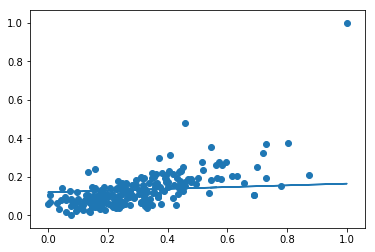

In [13]:
plt.scatter(X,y)
plt.plot(X, (th0)+(th1)*X)